<a href="https://colab.research.google.com/github/tgwon/ai4ml/blob/main/project/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# drive mount
# 라이브러리 설치 및 seed 설정.

from google.colab import drive
drive.mount('/content/drive')

import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Train data EDA

In [6]:
train_org = pd.read_csv('drive/MyDrive/ai4ml/open/train.csv')

In [5]:
train_org.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [8]:
train_org.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형',
       '사고유형 - 세부분류', '법규위반', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도',
       '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수',
       '경상자수', '부상자수', 'ECLO'],
      dtype='object')

In [9]:
train_org.shape

(39609, 23)

In [11]:
# 모든 설명변수가 범주형 변수 -> catboost?
train_org.describe()

,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


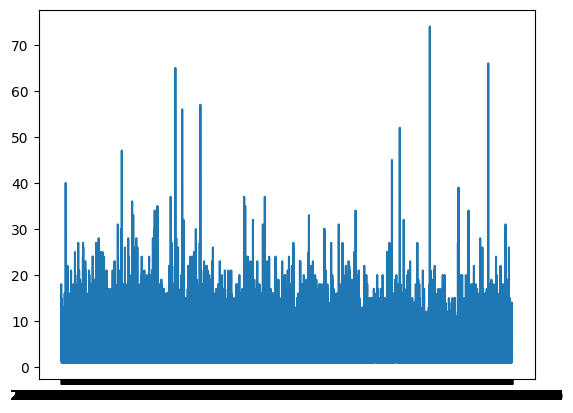

In [28]:
plt.plot(train_org.사고일시, train_org.ECLO)

In [31]:
# 차대차 사고가 가장 많음
train_org.groupby('사고유형')['ECLO'].count()

사고유형
차대사람     6833
차대차     31785
차량단독      991
Name: ECLO, dtype: int64

In [32]:
# 평균적으로 차대차 사고가 피해가 가장 심함.
train_org.groupby('사고유형')['ECLO'].mean()

사고유형
차대사람    3.817650
차대차     4.944597
차량단독    4.006054
Name: ECLO, dtype: float64

In [41]:
# 가장 사고가 많은 요일 : 금
# 가장 사고가 적은 요일 : 일
train_org.groupby('요일')['ECLO'].count().sort_values()

요일
일요일    4114
토요일    5670
목요일    5759
월요일    5895
수요일    5969
화요일    6023
금요일    6179
Name: ECLO, dtype: int64

In [42]:
# 인명피해가 평균적으로 가장 심한 요일 : 일
# 인명피해가 평균적으로 가장 적은 요일 : 목
train_org.groupby('요일')['ECLO'].mean().sort_values()

요일
목요일    4.560688
금요일    4.600906
수요일    4.627408
화요일    4.627926
월요일    4.698049
토요일    4.920811
일요일    5.210258
Name: ECLO, dtype: float64

In [12]:
# 결측치 확인
train_org.isnull().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [29]:
train_null = train_org[train_org['피해운전자 차종'].isnull()]
train_null.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
14,ACCIDENT_00014,2019-01-01 19,화요일,맑음,대구광역시 수성구 황금동,단일로 - 교량,건조,차량단독,공작물충돌,안전운전불이행,...,중상,NaN,NaN,NaN,NaN,0,1,1,0,8
53,ACCIDENT_00053,2019-01-02 23,수요일,맑음,대구광역시 북구 서변동,교차로 - 교차로부근,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
100,ACCIDENT_00100,2019-01-04 12,금요일,맑음,대구광역시 동구 도학동,단일로 - 기타,건조,차량단독,공작물충돌,안전운전불이행,...,경상,NaN,NaN,NaN,NaN,0,0,1,0,3
118,ACCIDENT_00118,2019-01-04 20,금요일,맑음,대구광역시 남구 대명동,교차로 - 교차로부근,건조,차량단독,기타,기타,...,상해없음,NaN,NaN,NaN,NaN,0,0,1,0,3
141,ACCIDENT_00141,2019-01-05 16,토요일,맑음,대구광역시 달성군 가창면,교차로 - 교차로안,건조,차량단독,기타,안전운전불이행,...,상해없음,NaN,NaN,NaN,NaN,0,2,0,0,10


## Test data EDA

In [16]:
test_org = pd.read_csv('drive/MyDrive/ai4ml/open/test.csv')

In [17]:
test_org.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [18]:
test_org.columns

Index(['ID', '사고일시', '요일', '기상상태', '시군구', '도로형태', '노면상태', '사고유형'], dtype='object')

In [19]:
test_org.shape

(10963, 8)

In [25]:
test_org.isnull().sum()

ID      0
사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64